<a href="https://colab.research.google.com/github/oscarrobert-star/Spot-the-Mask-Challenge-by-ZindiWeekendz/blob/master/mask_3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Importing the data into google colab

In [0]:
!wget -O images.zip --load-cookies /tmp/cookies.txt "https://docs.google.com/uc?export=download&confirm=$(wget --quiet --save-cookies /tmp/cookies.txt --keep-session-cookies --no-check-certificate 'https://docs.google.com/uc?export=download&id=1vtO5_FB--urbF09XYoxbSAEQW-yqwoi6' -O- | sed -rn 's/.*confirm=([0-9A-Za-z_]+).*/\1\n/p')&id=1vtO5_FB--urbF09XYoxbSAEQW-yqwoi6" && rm -rf /tmp/cookies.txt


--2020-04-19 21:52:16--  https://docs.google.com/uc?export=download&confirm=r4V1&id=1vtO5_FB--urbF09XYoxbSAEQW-yqwoi6
Resolving docs.google.com (docs.google.com)... 172.217.214.113, 172.217.214.101, 172.217.214.100, ...
Connecting to docs.google.com (docs.google.com)|172.217.214.113|:443... connected.
HTTP request sent, awaiting response... 302 Moved Temporarily
Location: https://doc-0c-bo-docs.googleusercontent.com/docs/securesc/rujj63knvuqqm06g4qg2r3o0p8bsml1i/v6e9i1ervccr1gj0v17nlk39lr87pl4j/1587333075000/12463928819926971683/01901429415479126530Z/1vtO5_FB--urbF09XYoxbSAEQW-yqwoi6?e=download [following]
--2020-04-19 21:52:16--  https://doc-0c-bo-docs.googleusercontent.com/docs/securesc/rujj63knvuqqm06g4qg2r3o0p8bsml1i/v6e9i1ervccr1gj0v17nlk39lr87pl4j/1587333075000/12463928819926971683/01901429415479126530Z/1vtO5_FB--urbF09XYoxbSAEQW-yqwoi6?e=download
Resolving doc-0c-bo-docs.googleusercontent.com (doc-0c-bo-docs.googleusercontent.com)... 74.125.124.132, 2607:f8b0:4001:c14::84
Connec

In [0]:
!wget -O train.csv --load-cookies /tmp/cookies.txt "https://docs.google.com/uc?export=download&confirm=$(wget --quiet --save-cookies /tmp/cookies.txt --keep-session-cookies --no-check-certificate 'https://docs.google.com/uc?export=download&id=1XQ-RfUG1C_6LUZdRUe9nAU77I_AZFH-F' -O- | sed -rn 's/.*confirm=([0-9A-Za-z_]+).*/\1\n/p')&id=1XQ-RfUG1C_6LUZdRUe9nAU77I_AZFH-F" && rm -rf /tmp/cookies.txt

--2020-04-19 21:52:30--  https://docs.google.com/uc?export=download&confirm=&id=1XQ-RfUG1C_6LUZdRUe9nAU77I_AZFH-F
Resolving docs.google.com (docs.google.com)... 108.177.112.113, 108.177.112.138, 108.177.112.101, ...
Connecting to docs.google.com (docs.google.com)|108.177.112.113|:443... connected.
HTTP request sent, awaiting response... 302 Moved Temporarily
Location: https://doc-0g-9g-docs.googleusercontent.com/docs/securesc/s8qoj8o6vflenm517lgki4ulc7t7umbe/ukajt3f3c0trltloc7povrdfc4cr2u1g/1587333150000/12463928819926971683/15613863901798042882Z/1XQ-RfUG1C_6LUZdRUe9nAU77I_AZFH-F?e=download [following]
--2020-04-19 21:52:30--  https://doc-0g-9g-docs.googleusercontent.com/docs/securesc/s8qoj8o6vflenm517lgki4ulc7t7umbe/ukajt3f3c0trltloc7povrdfc4cr2u1g/1587333150000/12463928819926971683/15613863901798042882Z/1XQ-RfUG1C_6LUZdRUe9nAU77I_AZFH-F?e=download
Resolving doc-0g-9g-docs.googleusercontent.com (doc-0g-9g-docs.googleusercontent.com)... 74.125.124.132, 2607:f8b0:4001:c14::84
Connecting

In [0]:
!unzip -qq -n images.zip

# Splitting the data into train and test sets

In [0]:
import pandas as pd
import os
train = pd.read_csv('all_data/train.csv')

train_images_list = train['image'].tolist()

images_list = os.listdir("all_data/images")

test_images_list = [fn for fn in images_list if fn not in train_images_list]

# Importing libraries

In [0]:
from pathlib import Path

from fastai.basic_data import DatasetType
from fastai.callbacks import SaveModelCallback
from fastai.metrics import accuracy
from fastai.train import ClassificationInterpretation
from fastai.vision.data import ImageList
from fastai.vision.learner import cnn_learner
from fastai.vision.models import resnet18
from fastai.vision.transform import ResizeMethod, get_transforms
from fastai.vision import imagenet_stats

import pandas as pd

In [0]:
path = Path('all_data')
il = ImageList.from_csv(path, 'train.csv', folder='images')
sd = il.split_by_rand_pct(0.15)
ll = sd.label_from_df()
ll = ll.transform(get_transforms(), size=224)
data = ll.databunch(bs=64).normalize(imagenet_stats)

In [0]:
data

In [0]:
il

In [0]:
import csv
# Check to see if sample_sub_v2.csv is downloaded
test_csv2 = pd.read_csv('all_data/sample_sub_v2.csv')
test_csv2.head()


,image,target
0,aadawlxbmapqrblgxyzarhjasgiobu.png,0
1,abpxvdfyhaaohzcrngcucmhffwizxs.jpg,0
2,aclkjfvackiieiznzfcwienplielrj.jpg,0
3,aelkivmayxgsdjosiibfgmkvfrjvjk.jpg,0
4,aelzzshpfxerelefnkatpczktuxjln.jpg,0


In [0]:
test = (ImageList.from_csv(path, 'sample_sub_v2.csv', folder='images'))
data.add_test(test)

In [0]:
data

In [0]:
data.show_batch(3)

In [0]:
learn = cnn_learner(data, resnet18, metrics=accuracy)

Downloading: "https://download.pytorch.org/models/resnet18-5c106cde.pth" to /root/.cache/torch/checkpoints/resnet18-5c106cde.pth


In [0]:
learn.loss_func

In [0]:
learn.opt_func

functools.partial(<class 'torch.optim.adam.Adam'>, betas=(0.9, 0.99))

LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


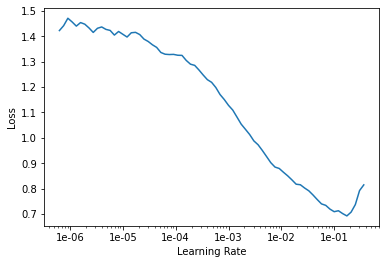

In [0]:

learn.lr_find()
learn.recorder.plot()

In [0]:
lr = 1e-2

In [0]:
l
#learn.fit_one_cycle(3, lr)

epoch,train_loss,valid_loss,accuracy,time
0,0.547994,0.459113,0.923469,04:21
1,0.325723,0.126825,0.964286,04:15


In [0]:
learn.fit_one_cycle(2, slice(lr/10,lr)) # best solution has epochs = 2, lr = 1e-2

epoch,train_loss,valid_loss,accuracy,time
0,0.889301,2.023086,0.877551,03:43
1,0.825825,0.969390,0.918367,03:36


In [0]:
preds, y = learn.get_preds(DatasetType.Test)

In [0]:
preds[:, 1]

tensor([6.9619e-01, 4.7600e-03, 1.0000e+00, 9.8950e-01, 1.3949e-07, 4.5408e-10,
        1.0000e+00, 1.2621e-02, 2.7212e-10, 1.0000e+00, 9.4074e-09, 1.2605e-09,
        1.0000e+00, 1.0000e+00, 9.9948e-01, 4.5299e-07, 7.8784e-01, 1.0000e+00,
        9.1099e-02, 1.0000e+00, 1.7374e-02, 1.2950e-08, 1.0000e+00, 3.1917e-06,
        4.2593e-05, 9.8871e-01, 1.0000e+00, 1.1732e-06, 1.0000e+00, 1.0000e+00,
        2.0987e-01, 1.2031e-01, 1.0000e+00, 9.9688e-01, 1.0000e+00, 2.1701e-08,
        6.0741e-08, 1.0000e+00, 2.2991e-07, 1.0000e+00, 9.9989e-01, 1.0000e+00,
        2.6774e-02, 3.8771e-06, 1.0000e+00, 9.4541e-10, 9.9999e-01, 9.9996e-01,
        9.9887e-01, 1.6409e-04, 5.8993e-09, 1.0000e+00, 1.0000e+00, 9.9944e-01,
        9.9988e-01, 2.8495e-07, 1.4060e-05, 1.0000e+00, 2.6996e-09, 9.9997e-01,
        5.5410e-06, 1.7094e-05, 6.9861e-06, 9.9999e-01, 2.4011e-02, 1.0000e+00,
        9.9896e-01, 9.8220e-01, 9.9990e-01, 1.0000e+00, 3.3123e-07, 9.0977e-08,
        9.9956e-01, 2.5150e-09, 4.2035e-

# submissions

In [0]:
list_test = test_csv2['image'].tolist()

In [0]:
subm = pd.DataFrame({'image': list_test, 'target': preds[:, 1]})

In [0]:
subm.head()

,image,target
0,aadawlxbmapqrblgxyzarhjasgiobu.png,7.651674e-01
1,abpxvdfyhaaohzcrngcucmhffwizxs.jpg,5.579186e-24
2,aclkjfvackiieiznzfcwienplielrj.jpg,9.999989e-01
3,aelkivmayxgsdjosiibfgmkvfrjvjk.jpg,9.999999e-01
4,aelzzshpfxerelefnkatpczktuxjln.jpg,3.033006e-15


In [0]:
subm.to_csv('ss.csv', index=None)

In [0]:
from google.colab import files

files.download('ss.csv')